In [7]:
import pandas as pd
pd.options.display.max_columns = 100

In [8]:
assoc_muts_df = pd.read_pickle("./data/GYD_df.pkl")
display(assoc_muts_df.shape, assoc_muts_df.head())

(148, 44)

,index,Details,mutation target annotation,Mutation Type,Position,Reference Seq,Sequence Change,ale,exp,flask,isolate,presence,tech_rep,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,taxonomy-id,strain-description,base-media,temperature,carbon-source,nitrogen-source,phosphorous-source,sulfur-source,supplement,COGs,COG links,pathways,pathway links
630,66,T247M (ACG→ATG),yafD,SNP,231861,NC_000913,C→T,1,GYD,280,0,0.72,1,True,"(231861, 231861)",{ECK120001594},"[{'name': 'yafD', 'RegulonDB ID': 'ECK12000159...",False,False,{},{},{},{},{},True,"[{'name': 'yafD', 'RegulonDB ID': 'ECK12000159...",{'ECK120001594': ['ECK120001594']},"[{'name': 'yafDE', 'RegulonDB ID': 'ECK1200291...",{'ECK120029169': ['ECK120001594']},[],{},511145,BOP27,M9,37 celsius,glycerol(2.5),NH4Cl(1),KH2PO4(2),MgSO4(0.24),trace elements,"[{'name': 'General function prediction only', ...",{'General function prediction only': ['ECK1200...,[],{}
631,126,R665S (CGT→AGT),cyaA,SNP,3993145,NC_000913,C→A,1,GYD,280,0,1.00,1,True,"(3993145, 3993145)",{ECK120000166},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",False,False,{},{},{},{},{},True,"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",{'ECK120014835': ['ECK120000166']},"[{'name': 'CRP', 'significantly associated con...",{'CRP': ['cyaA']},511145,BOP27,M9,37 celsius,glycerol(2.5),NH4Cl(1),KH2PO4(2),MgSO4(0.24),trace elements,[{'name': 'Nucleotide transport and metabolism...,{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'Purine metabolism', 'mutation set c...",{'Purine metabolism': ['ECK120014835']}
632,94,S59Y (TCC→TAC),glpK,SNP,4117047,NC_000913,G→T,1,GYD,280,0,1.00,1,True,"(4117047, 4117047)",{ECK120000391},"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",False,False,{},{},{},{},{},True,"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",{'ECK120000391': ['ECK120000391']},"[{'name': 'glpFKX', 'RegulonDB ID': 'ECK120014...",{'ECK120014723': ['ECK120000391']},"[{'name': 'CRP', 'significantly associated con...","{'CRP': ['glpFKX'], 'GlpR': ['glpFKX']}",511145,BOP27,M9,37 celsius,glycerol(2.5),NH4Cl(1),KH2PO4(2),MgSO4(0.24),trace elements,"[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'Glycerolipid metabolism', 'mutation...",{'Glycerolipid metabolism': ['ECK120014723']}
633,72,T593P (ACC→CCC),metL,SNP,4131611,NC_000913,A→C,1,GYD,280,0,0.67,1,True,"(4131611, 4131611)",{ECK120000583},"[{'name': 'metL', 'RegulonDB ID': 'ECK12000058...",False,False,{},{},{},{},{},True,"[{'name': 'metL', 'RegulonDB ID': 'ECK12000058...",{'ECK120000583': ['ECK120000583']},"[{'name': 'metBL', 'RegulonDB ID': 'ECK1200150...",{'ECK120015057': ['ECK120000583']},"[{'name': 'PhoP', 'significantly associated co...","{'PhoP': ['metBL'], 'HypT': ['metBL'], 'MetJ':...",511145,BOP27,M9,37 celsius,glycerol(2.5),NH4Cl(1),KH2PO4(2),MgSO4(0.24),trace elements,[{'name': 'Amino acid transport and metabolism...,{'Amino acid transport and metabolism': ['ECK1...,"[{'name': 'Glycine, serine and threonine metab...","{'Glycine, serine and threonine metabolism': [..."
634,107,E641K (GAA→AAA),rpoB,SNP,4183165,NC_000913,G→A,1,GYD,280,0,1.00,1,True,"(4183165, 4183165)",{ECK120000885},"[{'name': 'rpoB', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoB', 'RegulonDB ID': 'ECK12000088...",{'ECK120000885': ['ECK120000885']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000885']},[],{},511145,BOP27,M9,37 celsius,glycerol(2.5),NH4Cl(1),KH2PO4(2),MgSO4(0.24),trace elements,"[{'name': 'Transcription', 'mutation set count...",{'Transcription': ['ECK120016992']},"[{'name': 'Purine metabolism', 'mutation set c...","{'Purine metabolism': ['ECK120016992'], 'Pyrim..."


In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("talk")
sns.set_style("white")

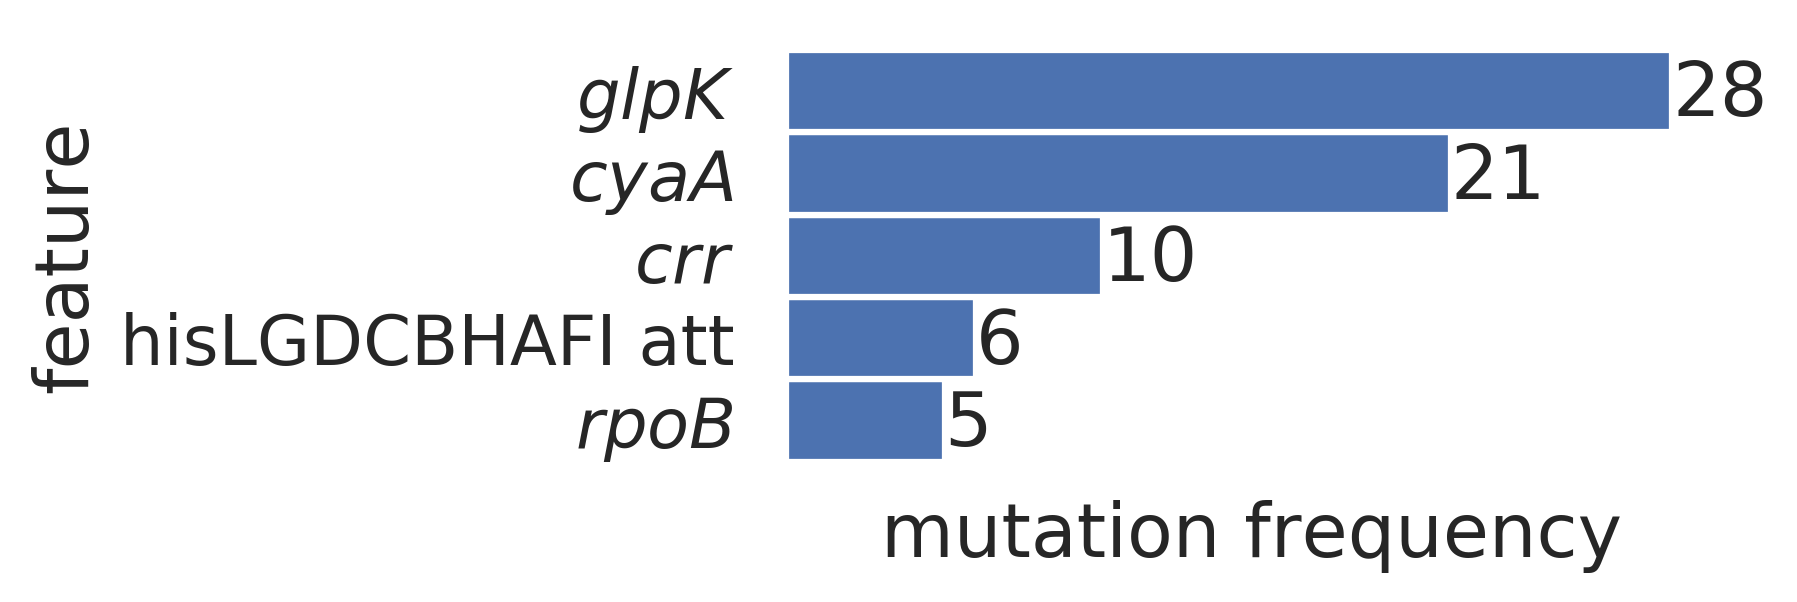

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("talk")
sns.set_style("white")

# TODO: found in multiple post-assoc NBs. Should extract into common script module.
def _get_name_signif_from_ID(RegulonDB_ID, json):
    name = ""
    is_signif = False
    for d in json:
        if d["RegulonDB ID"] == RegulonDB_ID:
            name = d["name"]
            is_signif = d["significant"]
            break
    return (name, is_signif)


targ_cnt_d = dict()
for _, r in assoc_muts_df.iterrows():
    for feat_d in r["genomic features"]:
               
        feat = feat_d["name"]
        if "attenuator terminator" in feat:
            feat = feat.replace("attenuator terminator", "att")
        if "terminator" in feat:
            feat = feat.replace("terminator", "term")
        
        t = str(feat)
#         if feat_d["significant"]:
#             t = '*' + t
        # ax.set_ylabel('$\it{glpK}$\n domain')
        if feat_d["genetic"]:
            t = '$\it{' + t + '}$'
        if t not in targ_cnt_d.keys():
            targ_cnt_d[t] = 0
        targ_cnt_d[t] += 1
        
df = pd.DataFrame.from_dict(targ_cnt_d, orient='index', columns=["mutated feature count"])
df = df.sort_values("mutated feature count")
df = df[-5:]
ax = df.plot.barh(y='mutated feature count',
                  figsize=(4,2),
                  color="#4C72B0",
                  width=1,
                 )

plt.tick_params(
    axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off

for i, v in enumerate(df["mutated feature count"]):
    ax.text(v, i - 0.3, str(v))
sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
# ax.set_title("Top 5 most frequently\nmutated features")
ax.set_title("")
ax.set_xlabel("mutation frequency")
ax.set_ylabel("feature")
ax.get_legend().remove()
plt.savefig("fig.svg", format="svg")

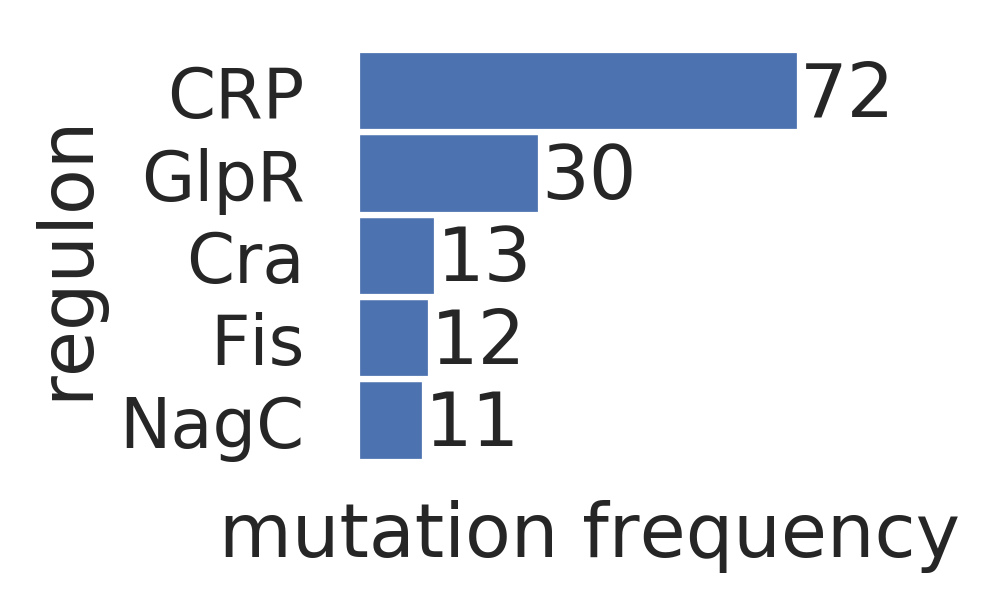

In [11]:
def _is_signif(name, regulons):
    is_signif = False
    for d in regulons:
        if d["name"] == name:
            is_signif = d["significant"]
    return is_signif


reg_cnt_d = dict()
for _, r in assoc_muts_df.iterrows():
    reg_link_d = r["regulator links"]
    for reg, hits in reg_link_d.items():
        t = reg        
#         if _is_signif(reg, r["regulators"]):
#             t = '*' + t
        if t not in reg_cnt_d.keys(): reg_cnt_d[t] = 0
        reg_cnt_d[t] += len(hits)
df = pd.DataFrame.from_dict(reg_cnt_d, orient='index', columns=["mutated feature count"])
df = df.sort_values("mutated feature count")
df = df[-5:]
ax = df.plot.barh(y='mutated feature count',
                  figsize=(2,2),
                  color="#4C72B0",
                  width=1
                 )

plt.tick_params(
    axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off

for i, v in enumerate(df["mutated feature count"]):
    ax.text(v, i - 0.3, str(v))
sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
# ax.set_title("Top 5 most frequently\nmutated regulons")
ax.get_legend().remove()
ax.set_xlabel('mutation frequency')
ax.set_ylabel('regulon')
plt.savefig("fig.svg", format="svg")